# Preview SMD Results from LAMMPS Simulation

In [1]:
# Import necessary packages.
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Create a directory to store files generated by this notebook.
out_path = "smd_analysis_output"
if not os.path.exists(out_path):
    os.mkdir(out_path)

## Import and Organize Data

In [3]:
# Read the SMD_Results file into a pandas DataFrame.
fpath = "smd_simulation/SMD_results"
colnames = ['Step','x1','y1','z1','x2','y2','z2','F_x', 'F_y', 'F_z', 'F_tot','R_spring','Ref_dist','PMF']
smd_df = pd.read_csv(fpath,skiprows=[0,1],header=None,names=colnames,delimiter='\s+')

# Create a column that is the change in distance between the reference atoms.
Ref_dist_initial = smd_df.Ref_dist[0]
smd_df['change_ref_dist'] = smd_df.Ref_dist - smd_df.Ref_dist[0]

# Convert force values from kcal/mol/A to pN by 69.5 pN = 1kcal/mol/A
fcols = ['F_x','F_y','F_z','F_tot']
for f in fcols:
    smd_df[f] = smd_df[f]*69.5
    
# Convert positions of the fix and pull atoms to distance column.
smd_df['distance'] = ((smd_df.x2-smd_df.x1) ** 2 + (smd_df.y2 - smd_df.y1) ** 2 + (smd_df.z2 - smd_df.z1) ** 2) ** 0.5

# Get the change in distance between the fix and pull atoms.
smd_df['change_distance'] = smd_df['distance'] - smd_df['distance'][0]

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_683253/980749841.py:4: SyntaxWarning: invalid escape sequence '\s'
  smd_df = pd.read_csv(fpath,skiprows=[0,1],header=None,names=colnames,delimiter='\s+')


In [4]:
# Preview the Pandas DataFrame.
smd_df.head()

,Step,x1,y1,z1,x2,y2,z2,F_x,F_y,F_z,F_tot,R_spring,Ref_dist,PMF,change_ref_dist,distance,change_distance
0,10100,115.376,104.333,27.0999,116.062,108.314,19.2153,0.000000,0.000000,0.00000,0.00000,9.99,10.00000,0.00000,0.00000,8.859225,0.000000
1,10200,115.375,104.333,27.1005,115.952,108.220,19.0453,111.902645,580.581455,-1104.81370,1252.82090,8.99,9.90149,9.53814,-0.09851,8.962586,0.103360
2,10300,115.374,104.332,27.1021,115.856,108.223,18.9211,250.484950,1170.873450,-2197.49270,2501.28415,7.99,9.80038,36.92460,-0.19962,9.071988,0.212763
3,10400,115.371,104.331,27.1042,116.328,108.298,18.8860,196.632875,1743.741100,-3314.14225,3748.34350,6.99,9.69787,81.24620,-0.30213,9.175606,0.316381
4,10500,115.371,104.331,27.1044,116.481,108.491,18.7870,182.791255,2216.799800,-4350.01195,4881.75645,5.99,9.51490,142.94600,-0.48510,9.365727,0.506502


## Summary of Columns in smd_df

- 'Step': simulation timestep.
- 'x1': x coordinate of the atom with no force or velocity.
- 'x2': y coordinate of the atom with no force or velocity.
- 'x3': z coordinate of the atom with no force or velocity.
- 'x2': x coordinate of the atom attached to the SMD spring.
- 'y2': y coordinate of the atom attached to the SMD spring.
- 'z2': z coordinate of the atom attached to the SMD spring.
- 'F_x': x component of the SMD pulling force.
- 'F_y': y component of the SMD pulling force.
- 'F_z': z component of the SMD pulling force.
- 'F_tot': total force in the direction of pull.
- 'R_spring': equilibrium distance of the spring.
- 'Ref_dist': The distance between the points attached to the reference points at the ends of the spring.
- 'PMF': accumulated potential of mean force (the sum of pulling forces times displacement).

## Plot Total Force on the Spring Versus Displacement Between the Reference Atoms

<>:5: SyntaxWarning: invalid escape sequence '\A'
<>:5: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_683253/2960985351.py:5: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('change_distance ($\AA$)')


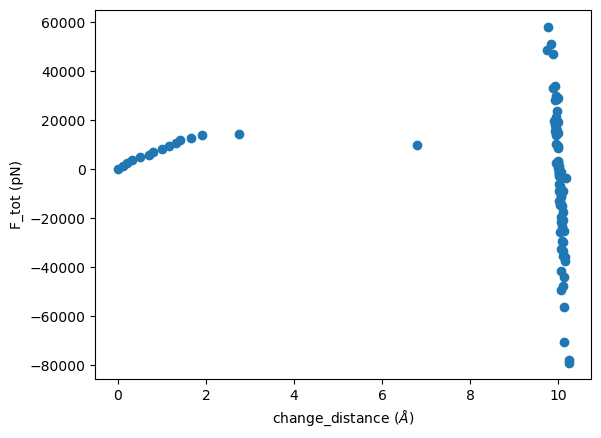

In [5]:
start_frame = 0
fig, ax = plt.subplots()
ax.scatter(smd_df.change_distance[start_frame:], smd_df.F_tot[start_frame:])
plt.ylabel('F_tot (pN)')
plt.xlabel('change_distance ($\AA$)')
# plt.ylim([0,20000])
plt.show()

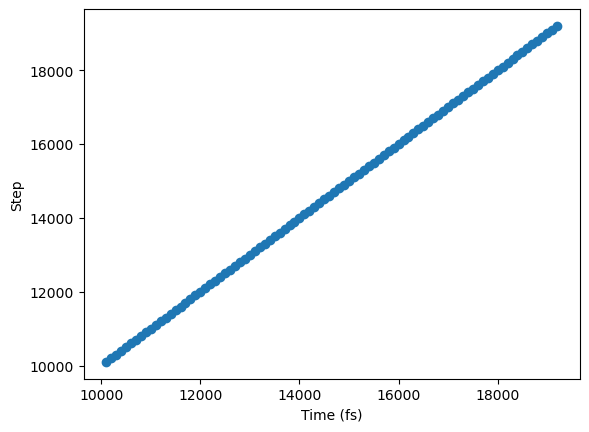

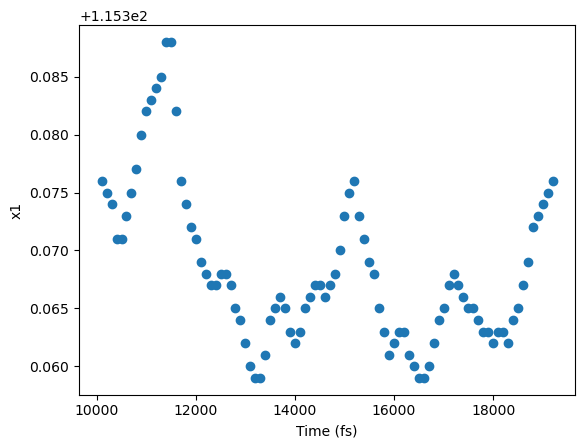

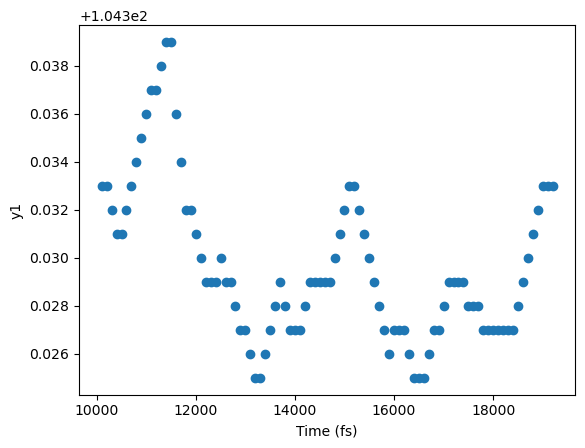

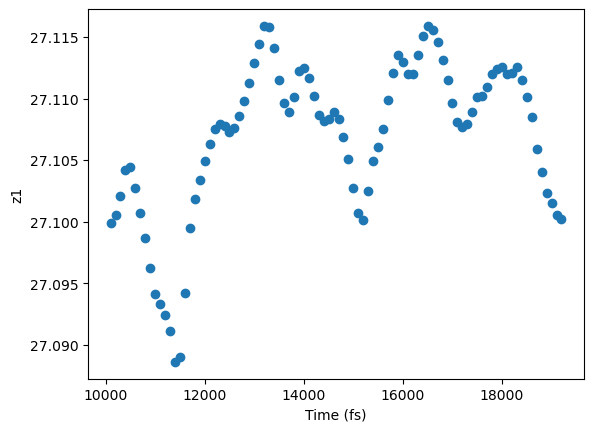

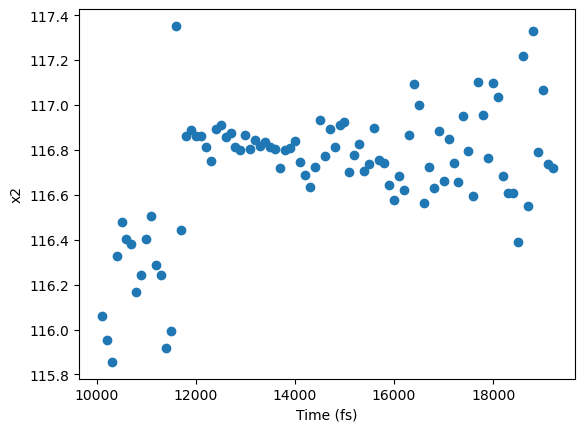

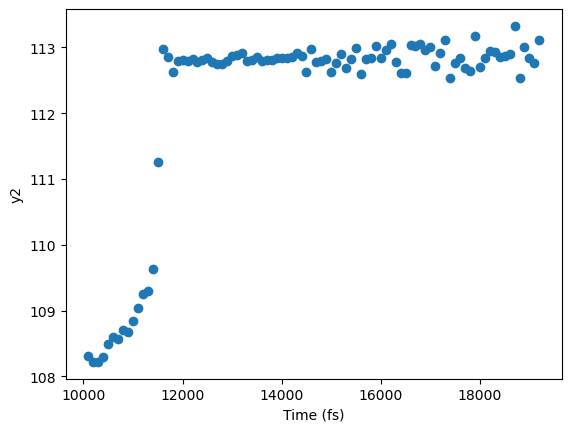

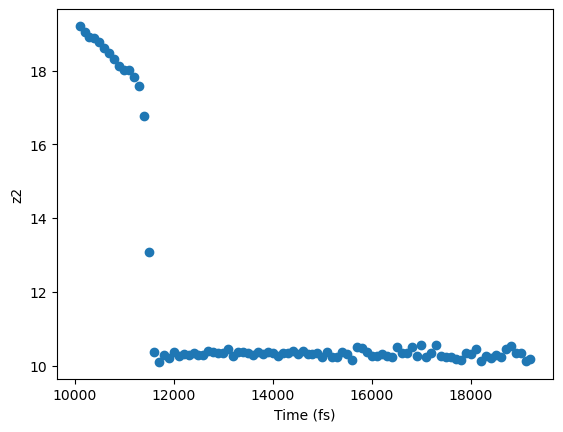

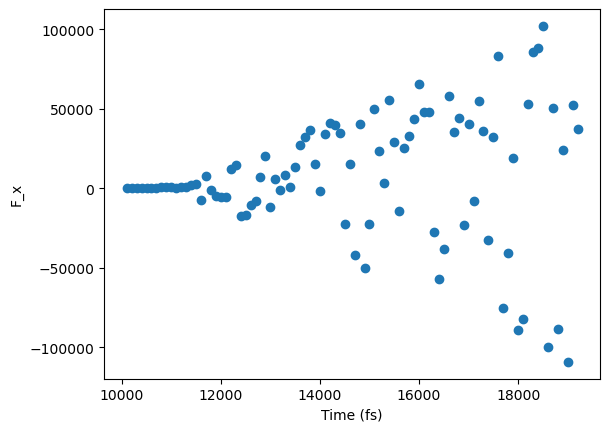

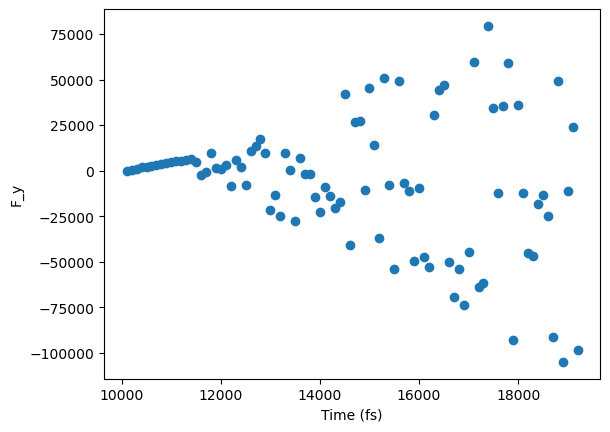

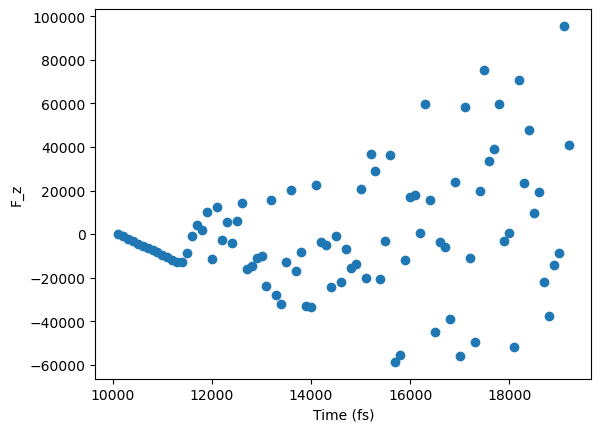

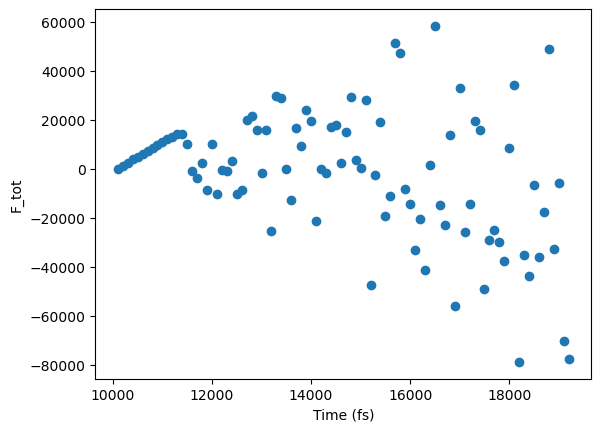

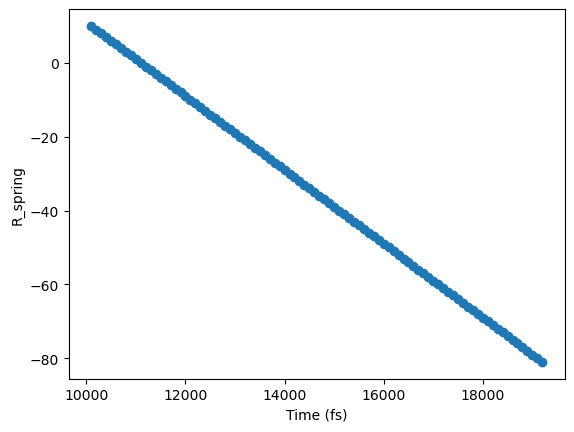

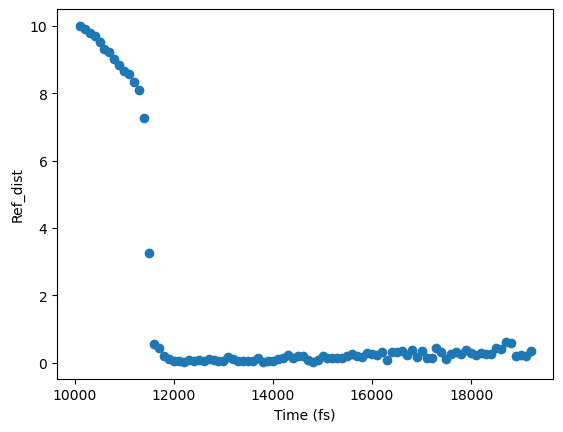

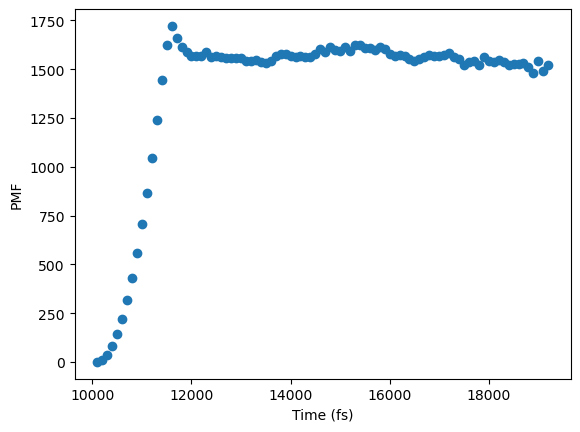

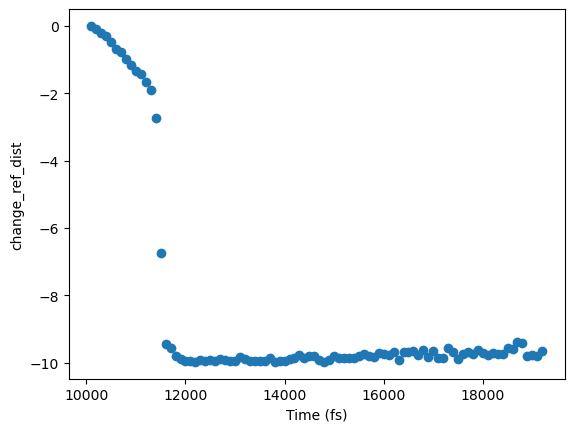

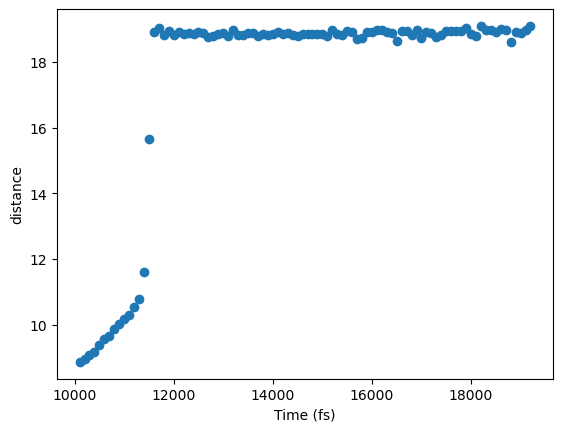

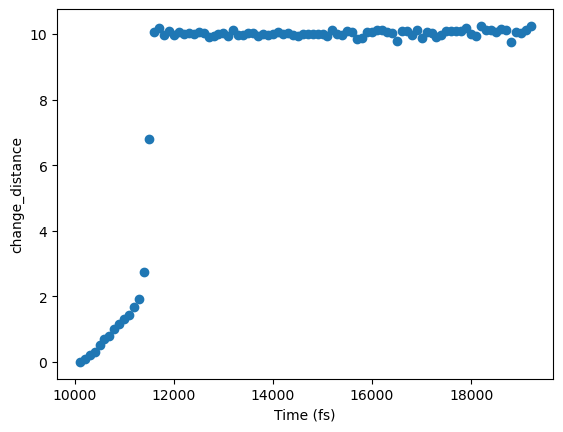

In [6]:
# Plot all columns as a function of time.
for col in smd_df.columns:
    fig, ax = plt.subplots()
    ax.scatter(smd_df.Step[start_frame:],smd_df[col][start_frame:])
    plt.xlabel('Time (fs)')
    plt.ylabel(col)
    plt.show()